In [113]:
#Import Necessary Libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
# Enter the ticker of the stock you want to analyze
ticker = "insert ticker here"

# Get stock data from yahoo finance
stock_data = yf.Ticker(ticker).history(period="1y")

In [115]:
# Calculate the Moving Average Convergence Divergence (MACD)
stock_data["EMA_12"] = stock_data["Close"].ewm(span=12, adjust=False).mean()
stock_data["EMA_26"] = stock_data["Close"].ewm(span=26, adjust=False).mean()
stock_data["MACD"] = stock_data["EMA_12"] - stock_data["EMA_26"]

In [116]:
# Calculate the MACD signal line
stock_data["MACD_Signal"] = stock_data["MACD"].ewm(span=9, adjust=False).mean()

# Calculate the MACD histogram
stock_data["MACD_Hist"] = stock_data["MACD"] - stock_data["MACD_Signal"]

# Calculate the Moving Average (MA)
stock_data["MA_50"] = stock_data["Close"].rolling(50).mean()
stock_data["MA_200"] = stock_data["Close"].rolling(200).mean()

# Calculate the percentage change of the MACD histogram
stock_data["MACD_Hist_Change"] = stock_data["MACD_Hist"].pct_change()

# Set the index to the date column
stock_data.index = stock_data.index.date

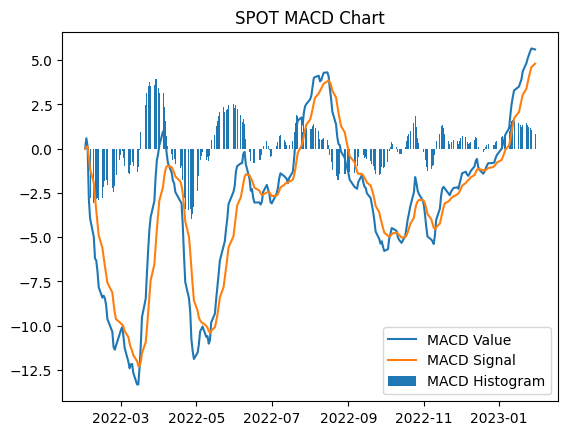

In [117]:
# Plot the MACD and MACD histogram
plt.plot(stock_data.index, stock_data["MACD"], label="MACD Value")
plt.plot(stock_data.index, stock_data["MACD_Signal"], label="MACD Signal")
plt.bar(stock_data.index, stock_data["MACD_Hist"], label="MACD Histogram")
plt.title(f'{ticker} MACD Chart')
plt.legend()
plt.show()

In [118]:
# Check if the MACD value is above the MACD signal line and the MACD histogram is positive and increasing
if (stock_data["MACD"].iloc[-1] > stock_data["MACD_Signal"].iloc[-1]) and (stock_data["MACD_Hist"].iloc[-1] > 0) and (stock_data["MACD_Hist_Change"].iloc[-1] > 0):
  print("Based on the MACD, it looks like a good time to buy the stock.")
  # Calculate the percentage change of the MACD histogram over the past 10 days
  hist_change = stock_data["MACD_Hist_Change"].tail(10).mean() * 100
  # Calculate the level of confidence in the buy recommendation based on the percentage change of the MACD histogram
  if hist_change > 10:
    print("I am very confident that this is a good buy.")
  elif hist_change > 5:
    print("I am somewhat confident that this is a good buy.")
  else:
    print("It may not be a good time to buy this stock.")

# Print MACD Values for Clarity
macd_value = stock_data['MACD'].iloc[-1]
macd_signal = stock_data["MACD_Signal"].iloc[-1]
macd_hist_change = stock_data["MACD_Hist_Change"].iloc[-1]
hist_change = stock_data["MACD_Hist_Change"].tail(10).mean() * 100
print(f'The MACD Value is {macd_value}')
print(f'The MACD Signal is {macd_signal}')
print(f'MACD Histogram Change is: {macd_hist_change}')
print(f'Hist. Change: {hist_change} (where >10 = very confident, >5 somewhat confident, <5 = probabbly not)')

The MACD Value is 5.602626564504703
The MACD Signal is 4.798035975980359
MACD Histogram Change is: -0.24125863010099358
Hist. Change: -6.047318365095642 (where >10 = very confident, >5 somewhat confident, <5 = probabbly not)


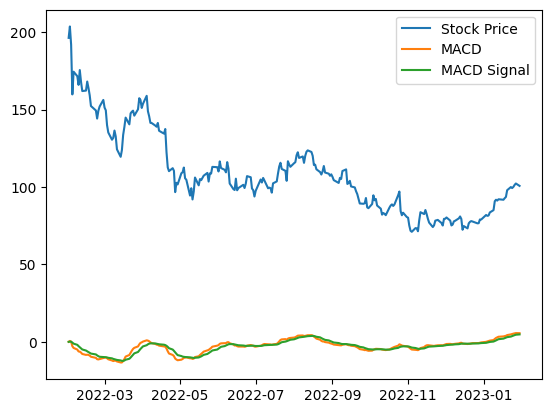

In [119]:
# Plot the stock price and MACD
plt.plot(stock_data.index, stock_data["Close"], label="Stock Price")
plt.plot(stock_data.index, stock_data["MACD"], label="MACD")
plt.plot(stock_data.index, stock_data["MACD_Signal"], label="MACD Signal")
plt.legend()
plt.show()